In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import json
import re
from dfpvizpy.dfpvizpy import dfpSave
import dexplot as dxp

%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None
sns.set(style="ticks", context='talk')
sns.set_palette('colorblind')

In [317]:
# reading in the data to a dataframe
df = pd.read_csv('DFP_WTHH_release.csv', index_col=0)
# this is the .json file with all of the questions and coding of the variables
with open('dfp_survey_questions.json', 'r') as fp:
    polling_info = json.load(fp)

Fixing some of the column data

In [327]:
# there are two values that need to be moved into the "employ" column
df.loc[2939]['employ'] = 6
df.loc[3110]['employ'] = 9
df.drop(columns='job', inplace=True)
df.drop(columns='weight_DFP', inplace=True)
df.fillna('?', inplace=True)

In [329]:
# these are columns which are the string 'other' responses
others = ['race_t', 'senvote18_t', 'senvote18_undecided_t', 'specsenvote18_t', 'specsenvote18_undecided_t',
          'housevote18_t', 'housevote18_undecided_t', 'govvote18_t', 'govvote18_undecided_t', 'NONVOTE_WHY_t',
          'pp18_polactions_txt', 'pid3_t', 'presvote16post_t', 'e14_presvote12_t', 'religpew_t']

# saving counts to a text file
with open('polling_counts.txt', 'w') as f:
    for column in df.columns:
        if column in df.columns and column in polling_info.keys() and column not in others:
            f.write(column + ' | ' + polling_info[column]["question"] + '\n\n')
            f.write("*-" * 40 + '\n\n')
            f.write(df[column].replace('?', 999).astype(int).astype(str).replace('999', '?').replace(polling_info[column]).value_counts().to_string())
            f.write('\n\n\n')

In [330]:
#for column in df.columns:
#    if column in df.columns and column in polling_info.keys() and column not in others:
#        print(column + ' | ' + start + polling_info[column]["question"] + end)
#        print("*-" * 40)
#        print(df[column].replace('?', 999).astype(int).astype(str).replace('999', '?').replace(polling_info[column]).value_counts().to_string())
#        print()

In [331]:
print(polling_info['FT_Whites']['question'])

dft = df[['FT_Whites', 'race']]
dft.race = dft['race'].replace('?', 999).astype(int).astype(str).replace('999', '?').replace(polling_info['race'])
dft = dft[dft.FT_Whites != '?']
dft.FT_Whites = dft["FT_Whites"].astype(float)
dfg = dft.groupby(['race']).median()
sort_order = dfg.sort_values(by='FT_Whites', ascending=False).index.tolist()

x_dat = df["race"].replace('?', 999).astype(int).astype(str).replace('999', '?').replace(polling_info['race'])
f, ax = plt.subplots(figsize=(13, 8))
idx = df[df.FT_Blacks != '?']
df_new = idx[idx.FT_Whites != '?']
ax = sns.boxplot(y=x_dat, x=df_new["FT_Whites"].astype(float), order=sort_order)
ax.set_ylabel('')
ax.set_title('Feelings Toward White People')
ax.set_xlabel('')
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xticklabels(['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'])
dfpSave('feelings_towards_white_people_by_race.png', [ax])
plt.show()

Whites Rate your feeling toward this group from zero (very cold or negative) to 100 (very warm or positive).


I want to look at how age plays a role in how you view the Confederate flag.

In [332]:
df['Flag'] = df["FLAG"].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['FLAG'])
df['Age'] = df["age5"].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['age5'])
df['Gender'] = df['gender'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['gender'])
df['Party'] = df['ideo5'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['ideo5'])
df['Medicare'] = df['M4A'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['M4A'])
df['College'] = df['FREECOLL'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['FREECOLL'])
df['Abolish ICE'] = df['ICE'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['ICE'])
df['Wealth'] = df['WEALTH'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['WEALTH'])
df['Welfare'] = df['WELTEST'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['WELTEST'])
df['Appreciate'] = df['APPRECIATE'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['APPRECIATE'])
df['Remarks'] = df['REMARKS'].replace('?', 999).astype(int).astype(str).replace('999', '?').replace(polling_info['REMARKS'])
df['Superior'] = df['SOCIALDOMINANCE_SUPERIOR'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['SOCIALDOMINANCE_SUPERIOR'])
df['Deport'] = df['DEPORT'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['DEPORT'])
df['Speak'] = df['SPEAK'].replace('?', 999).astype(int).astype(str).replace('999', '').replace(polling_info['SPEAK'])

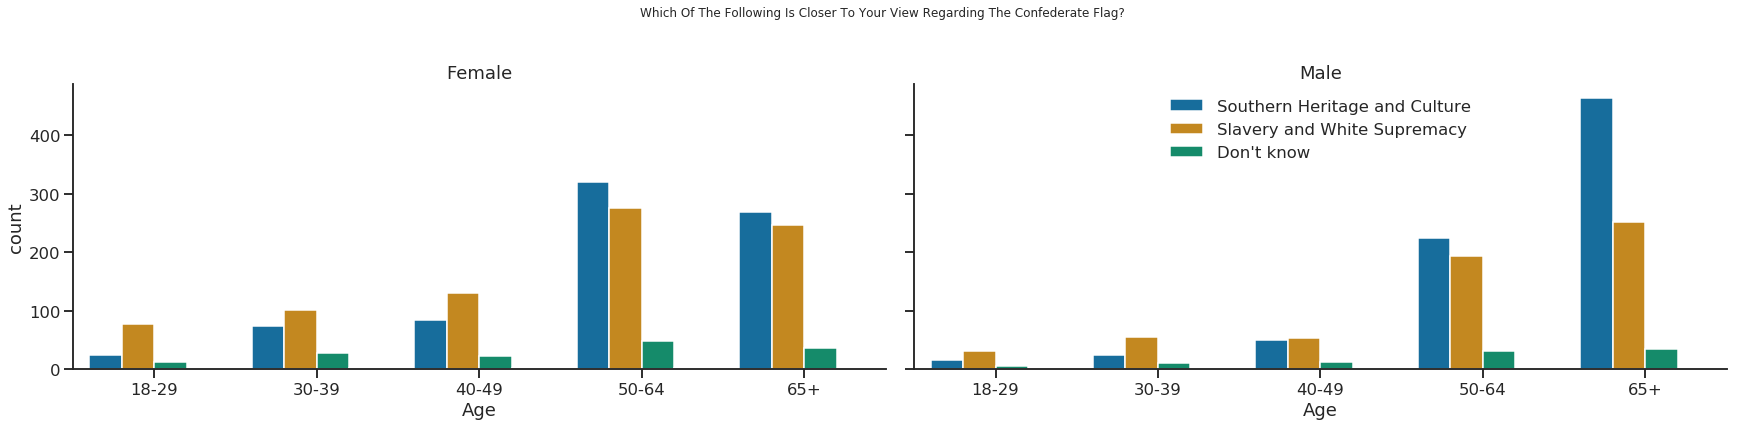

In [333]:
s = sns.catplot(x='Age', kind='count', hue='Flag', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# s.ax.set_ylabel('Number of Respondents')
# s.ax.set_xlabel('Age')
# s.ax.set_title(polling_info['FLAG']['question'])
s.axes[1].legend(frameon=False)
s.axes[0].set_title('Female')
s.axes[1].set_title('Male')
# s.fig.tight_layout()
s.fig.suptitle(polling_info['FLAG']['question'].title())
s.fig.subplots_adjust(top=0.8)
# dfpSave('age_and_the_flag.png', s.axes)
plt.show()

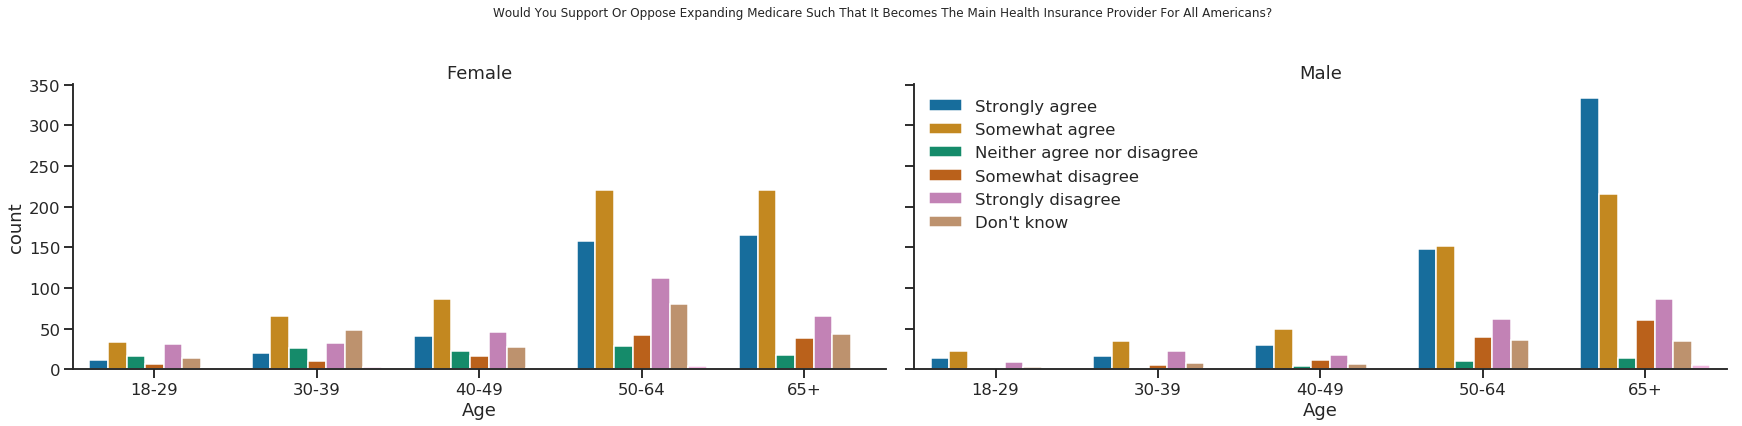

In [334]:
s = sns.catplot(x='Age', kind='count', hue='Medicare', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# s.ax.set_ylabel('Number of Respondents')
# s.ax.set_xlabel('Age')
# s.ax.set_title(polling_info['FLAG']['question'])
s.axes[1].legend(list(polling_info['APPRECIATE'].values())[:-1], frameon=False, loc=2)
s.axes[0].set_title('Female')
s.axes[1].set_title('Male')
# s.fig.tight_layout()
s.fig.suptitle(polling_info['M4A']['question'].title())
s.fig.subplots_adjust(top=0.8)
# dfpSave('age_and_the_medicare.png', s.axes)
plt.show()

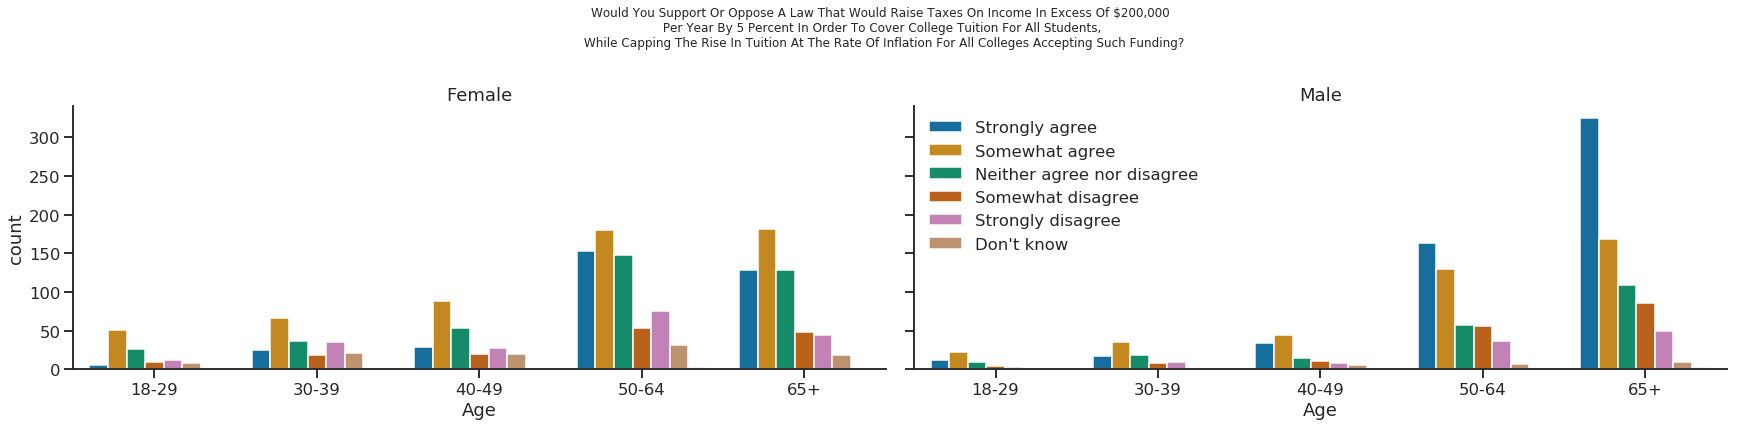

In [335]:
s = sns.catplot(x='Age', kind='count', hue='College', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# s.ax.set_ylabel('Number of Respondents')
# s.ax.set_xlabel('Age')
# s.ax.set_title(polling_info['FREECOLL']['question'])
s.axes[1].legend(list(polling_info['APPRECIATE'].values())[:-1], frameon=False, loc=2)
s.axes[0].set_title('Female')
s.axes[1].set_title('Male')
# s.fig.tight_layout()
col_title = 'Would You Support Or Oppose A Law That Would Raise Taxes On Income In Excess Of $200,000 \n Per Year By 5 Percent In Order To Cover College Tuition For All Students, \n While Capping The Rise In Tuition At The Rate Of Inflation For All Colleges Accepting Such Funding?'
s.fig.suptitle(col_title)
s.fig.subplots_adjust(top=.75)
# dfpSave('age_and_the_free_college.png', s.axes)
plt.show()

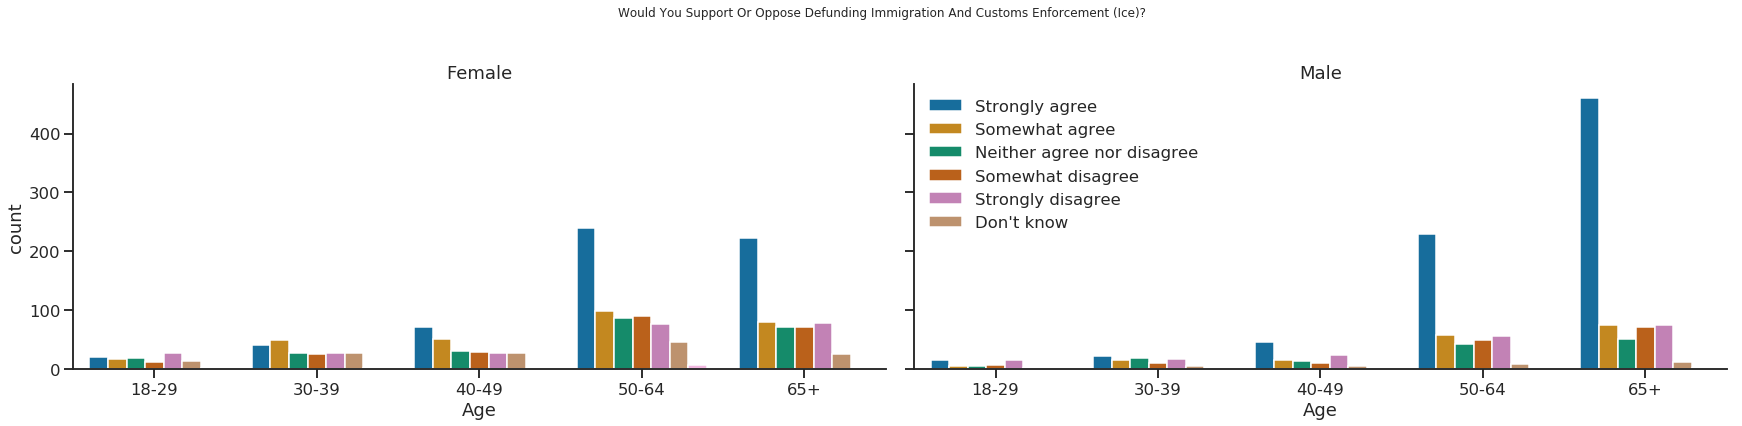

In [336]:
s = sns.catplot(x='Age', kind='count', hue='Abolish ICE', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# s.ax.set_ylabel('Number of Respondents')
# s.ax.set_xlabel('Age')
# s.ax.set_title(polling_info['ICE']['question'])
s.axes[1].legend(list(polling_info['APPRECIATE'].values())[:-1], frameon=False, loc=2)
s.axes[0].set_title('Female')
s.axes[1].set_title('Male')
# s.fig.tight_layout()
s.fig.suptitle(polling_info['ICE']['question'].title())
s.fig.subplots_adjust(top=0.8)
# dfpSave('age_and_the_ICE.png', s.axes)
plt.show()

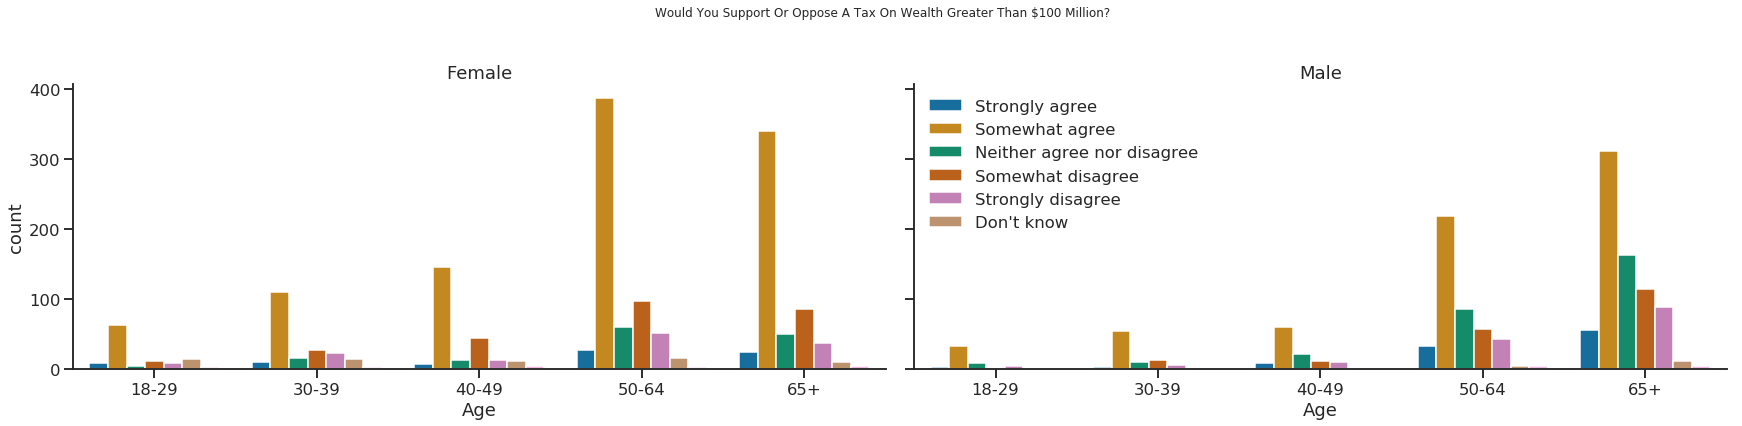

In [337]:
s = sns.catplot(x='Age', kind='count', hue='Wealth', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# s.ax.set_ylabel('Number of Respondents')
# s.ax.set_xlabel('Age')
# s.ax.set_title(polling_info['WEALTH']['question'])
s.axes[1].legend(list(polling_info['APPRECIATE'].values())[:-1], frameon=False, loc=2)
s.axes[0].set_title('Female')
s.axes[1].set_title('Male')
# s.fig.tight_layout()
s.fig.suptitle(polling_info['WEALTH']['question'].title())
s.fig.subplots_adjust(top=0.8)
# dfpSave('age_and_the_wealth.png', s.axes)
plt.show()

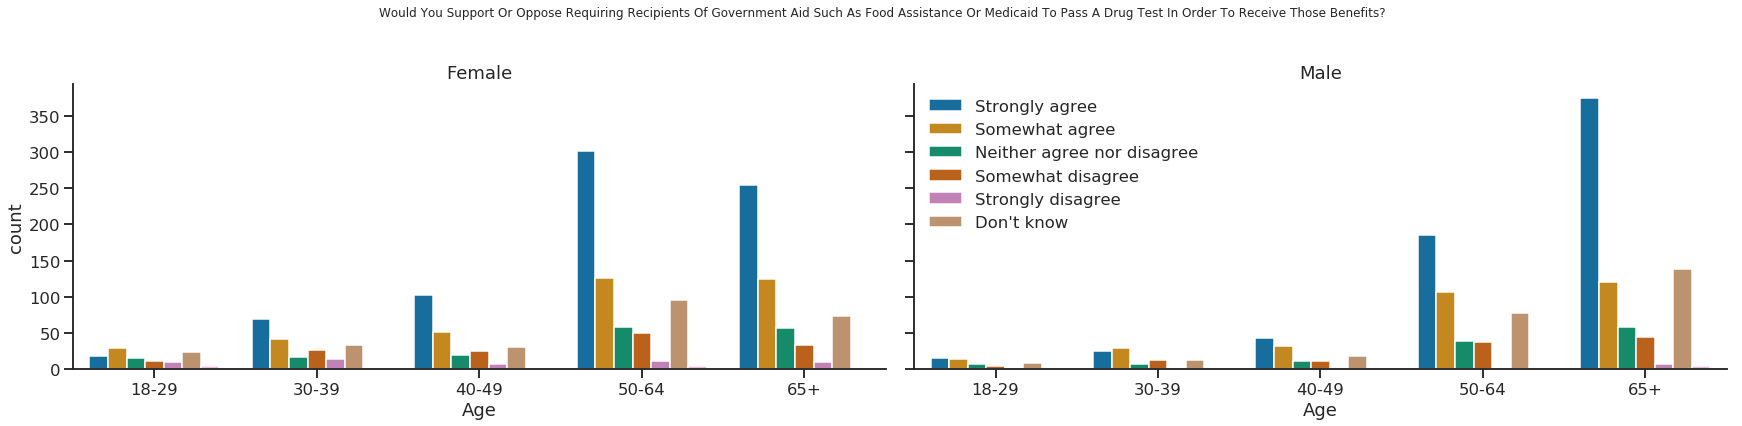

In [338]:
s = sns.catplot(x='Age', kind='count', hue='Welfare', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# s.ax.set_ylabel('Number of Respondents')
# s.ax.set_xlabel('Age')
# s.ax.set_title(polling_info['WELTEST']['question'])
s.axes[1].legend(list(polling_info['APPRECIATE'].values())[:-1], frameon=False, loc=2)
s.axes[0].set_title('Female')
s.axes[1].set_title('Male')
# s.fig.tight_layout()
s.fig.suptitle(polling_info['WELTEST']['question'].title())
s.fig.subplots_adjust(top=0.8)
# dfpSave('age_and_the_welfare_drug_test.png', s.axes)
plt.show()

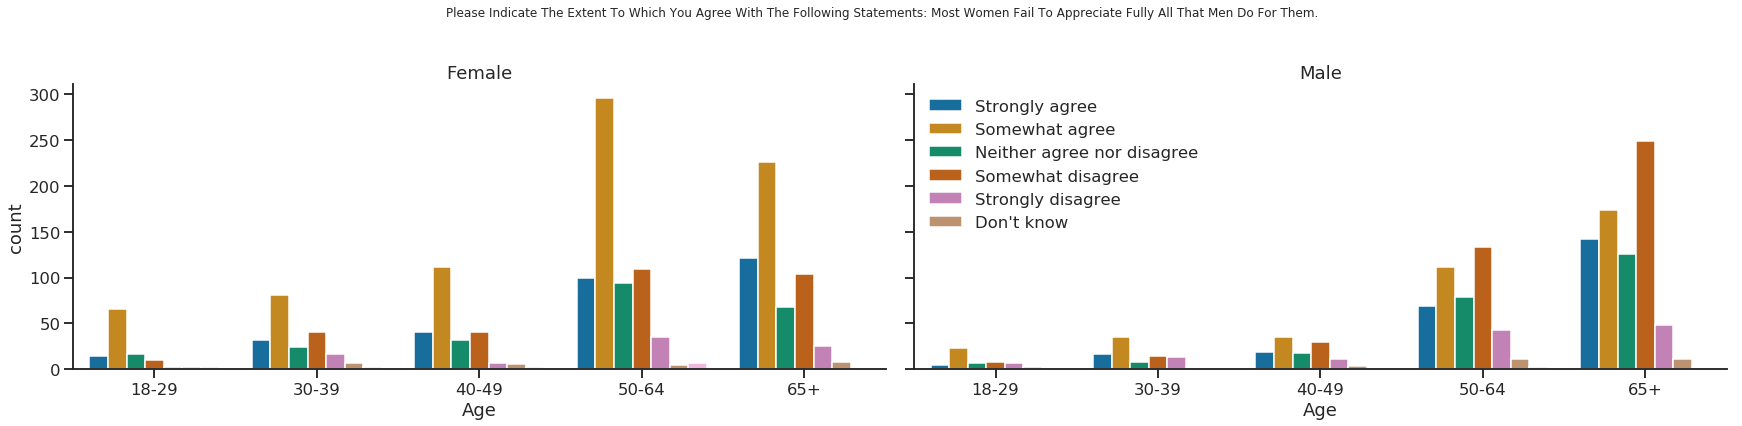

In [339]:
s = sns.catplot(x='Age', kind='count', hue='Appreciate', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# s.ax.set_ylabel('Number of Respondents')
# s.ax.set_xlabel('Age')
# s.ax.set_title(polling_info['APPRECIATE']['question'])
s.axes[1].legend(list(polling_info['APPRECIATE'].values())[:-1], frameon=False, loc=2)
s.axes[0].set_title('Female')
s.axes[1].set_title('Male')
# s.fig.tight_layout()
s.fig.suptitle(polling_info['APPRECIATE']['question'].title())
s.fig.subplots_adjust(top=0.8)
# dfpSave('age_and_appreciating_women.png', s.axes)
plt.show()

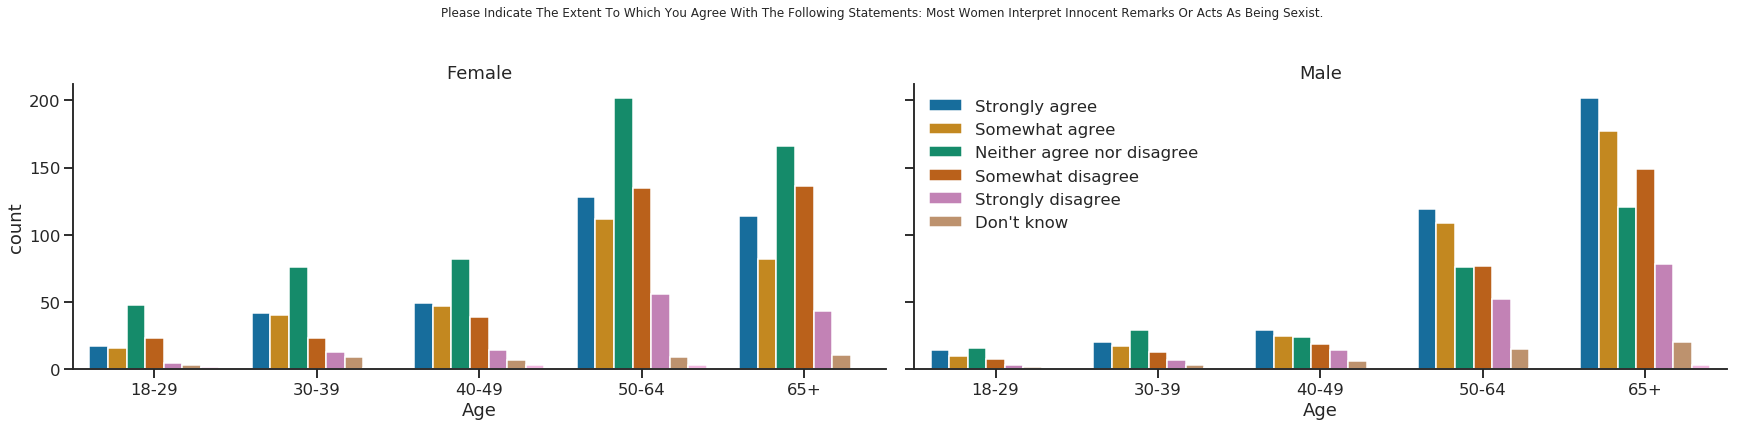

In [340]:
s = sns.catplot(x='Age', kind='count', hue='Remarks', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# s.ax.set_ylabel('Number of Respondents')
# s.ax.set_xlabel('Age')
# s.ax.set_title(polling_info['APPRECIATE']['question'])
s.axes[1].legend(list(polling_info['REMARKS'].values())[:-1], frameon=False, loc=2)
s.axes[0].set_title('Female')
s.axes[1].set_title('Male')
# s.fig.tight_layout()
s.fig.suptitle(polling_info['REMARKS']['question'].title())
s.fig.subplots_adjust(top=0.8)
# dfpSave('age_and_sexist_remarks.png', s.axes)
plt.show()

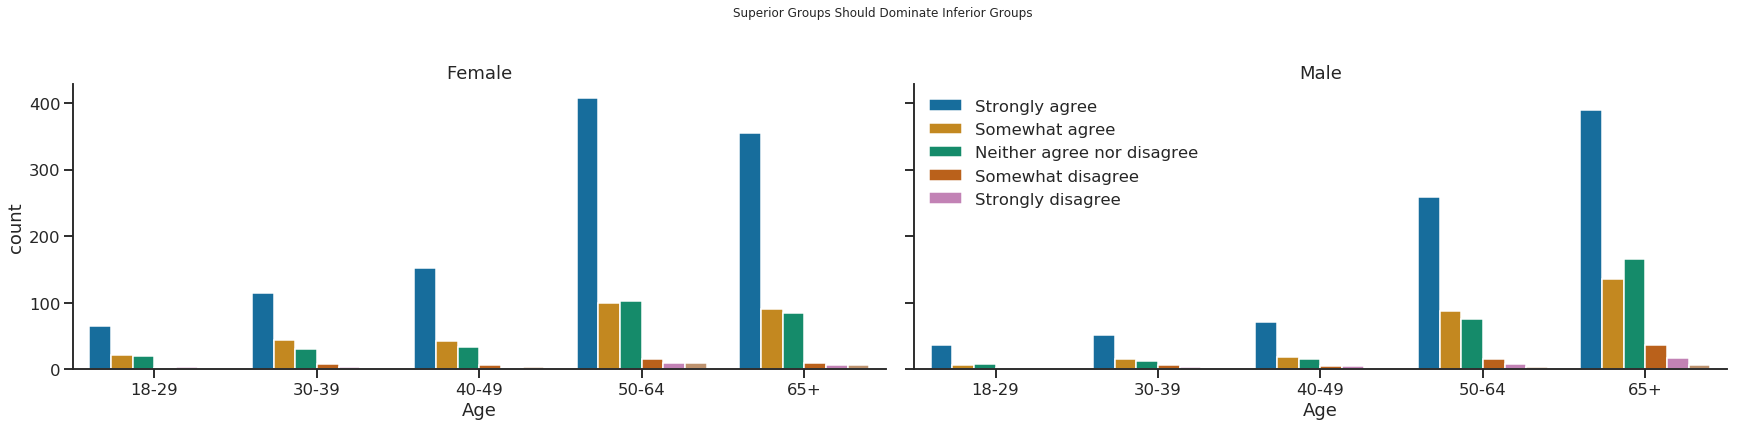

In [341]:
s = sns.catplot(x='Age', kind='count', hue='Superior', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# s.ax.set_ylabel('Number of Respondents')
# s.ax.set_xlabel('Age')
# s.ax.set_title(polling_info['APPRECIATE']['question'])
s.axes[1].legend(list(polling_info['SOCIALDOMINANCE_SUPERIOR'].values())[:-1], frameon=False, loc=2)
s.axes[0].set_title('Female')
s.axes[1].set_title('Male')
# s.fig.tight_layout()
s.fig.suptitle(polling_info['SOCIALDOMINANCE_SUPERIOR']['question'].title())
s.fig.subplots_adjust(top=0.8)
# dfpSave('age_and_superior_dominance.png', s.axes)
plt.show()

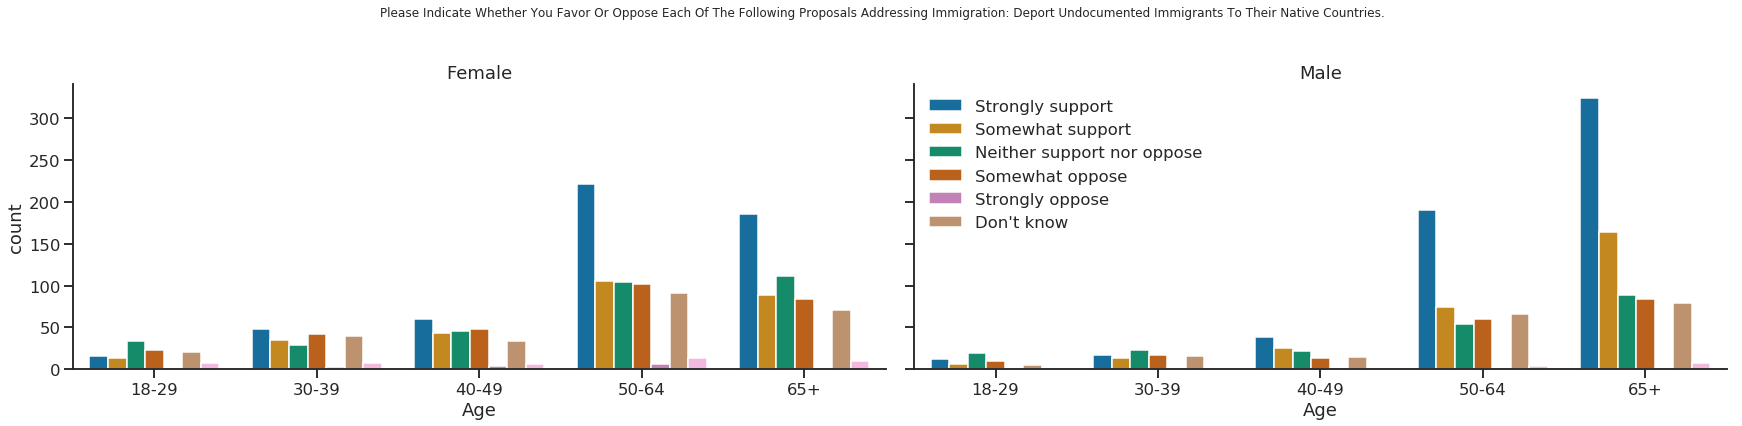

In [342]:
s = sns.catplot(x='Age', kind='count', hue='Deport', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# s.ax.set_ylabel('Number of Respondents')
# s.ax.set_xlabel('Age')
# s.ax.set_title(polling_info['DEPORT']['question'])
s.axes[1].legend(list(polling_info['DEPORT'].values())[:-1], frameon=False, loc=2)
s.axes[0].set_title('Female')
s.axes[1].set_title('Male')
# s.fig.tight_layout()
s.fig.suptitle(polling_info['DEPORT']['question'].title())
s.fig.subplots_adjust(top=0.8)
# dfpSave('age_and_deportation.png', s.axes)
plt.show()

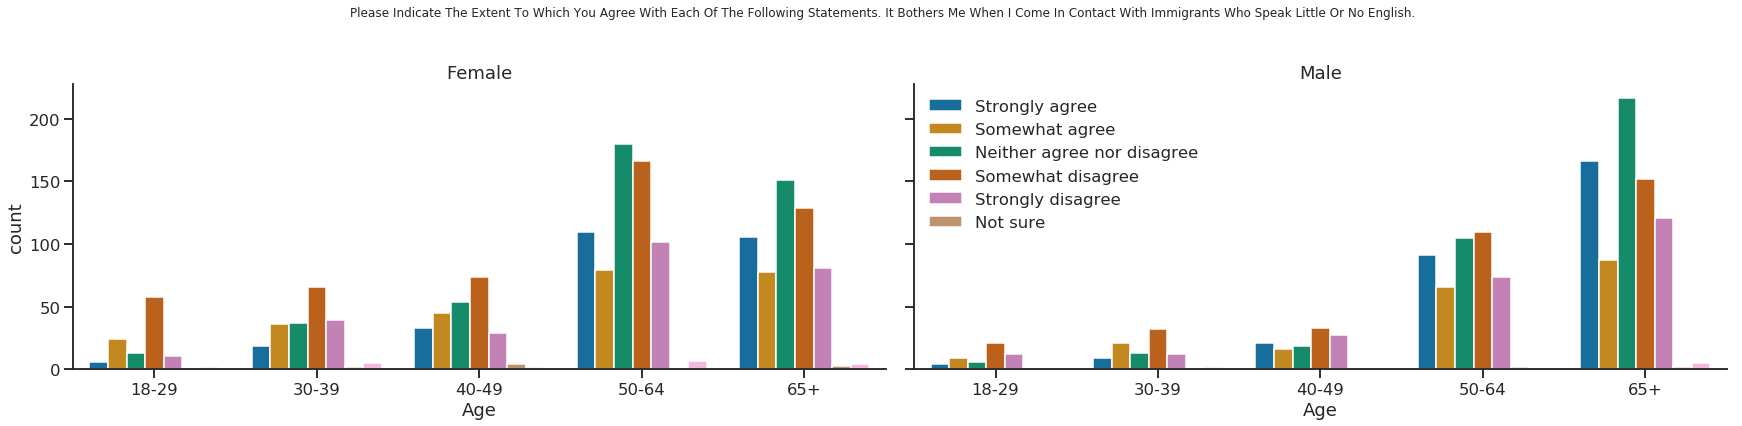

In [343]:
s = sns.catplot(x='Age', kind='count', hue='Speak', col='Gender', data=df, col_wrap=2, height=6, aspect=2, legend=False, order=list(polling_info['age5'].values())[:-1])
# s.ax.set_ylabel('Number of Respondents')
# s.ax.set_xlabel('Age')
# s.ax.set_title(polling_info['DEPORT']['question'])
s.axes[1].legend(list(polling_info['SPEAK'].values())[:-1], frameon=False, loc=2)
s.axes[0].set_title('Female')
s.axes[1].set_title('Male')
# s.fig.tight_layout()
s.fig.suptitle(polling_info['SPEAK']['question'].title())
s.fig.subplots_adjust(top=0.8)
# dfpSave('age_and_deportation.png', s.axes)
plt.show()

In [344]:
sdf = df[['Age', 'Abolish ICE']]

In [345]:
cols = ['Age']
dumb = pd.get_dummies(df['Age'])
dumb['Remarks'] = df.Remarks

new = dumb.groupby(by='Remarks').sum()
new['Total'] = new.sum(axis=1)
new

abc = pd.DataFrame([new.sum(axis=0).values], index=['Total'], columns=new.sum(axis=0).index)
abc

scaled = new.loc['?']/abc * 100
scaled.index = ['?']
for idx in list(polling_info['REMARKS'].values())[:-1]:
    scl = new.loc[idx]/abc * 100
    scl.index = [idx]
    scaled = pd.concat([scaled, scl], axis=0)

# here we want to make sure that the normalized variable does indeed sum to 100%
verify = pd.DataFrame([scaled.sum(axis=0).values])
pd.testing.assert_frame_equal(verify, pd.DataFrame([100] * len(verify.columns)).T, check_dtype=False)

scaled = np.round(scaled, decimals=2)
display(scaled)

,18-29,30-39,40-49,50-64,65+,Total
?,1.20,0.68,0.84,0.37,0.23,0.44
Strongly agree,4.79,6.80,7.82,9.87,9.29,8.86
Somewhat agree,18.56,21.09,21.79,22.58,24.27,22.83
Neither agree nor disagree,15.57,19.39,20.11,20.20,19.89,19.75
Somewhat disagree,18.56,12.24,16.20,19.38,21.89,19.35
Strongly disagree,38.32,35.71,29.61,25.41,22.04,26.13
Don't know,2.99,4.08,3.63,2.19,2.38,2.64


In [346]:
import itertools as it

In [348]:
te = pd.DataFrame([(a,b,c) for (a, b), c in zip(it.product(scaled.index, scaled.columns), scaled.values.flatten())])
te.columns = ['Remarks', 'Age', 'Percentage']

Text(0.5,0,'')

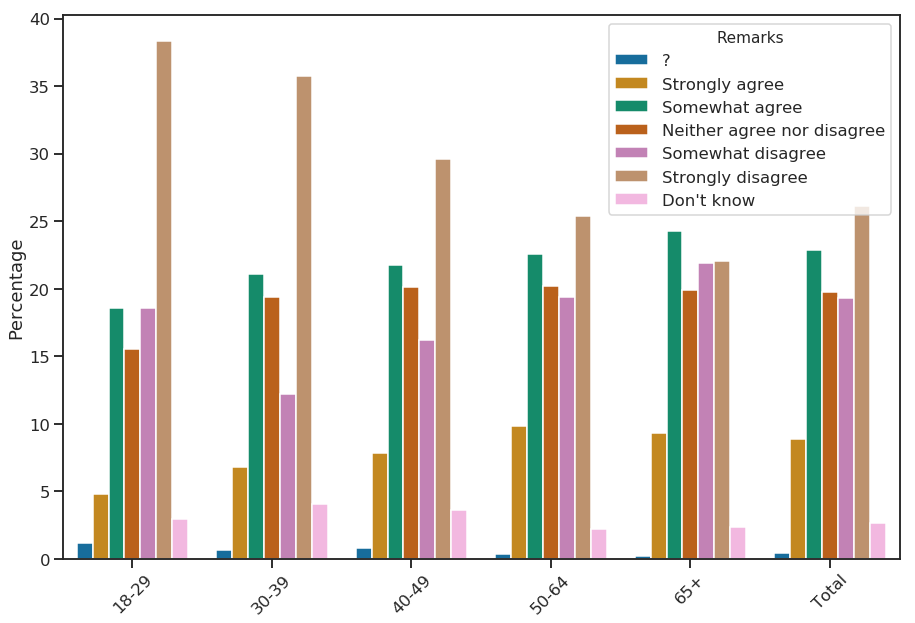

In [349]:
s = sns.barplot(x='Age', y='Percentage', hue='Remarks', data=te)
s.figure.set_figheight(10)
s.figure.set_figwidth(15)
s.axes.tick_params(axis='x', rotation=45)
s.axes.set_xlabel('')

In [351]:
net_dict = {'Strongly agree': 'Positive',
 'Somewhat agree': 'Positive',
 'Neither agree nor disagree': 'Neutral',
 'Somewhat disagree': 'Negative',
 'Strongly disagree': 'Negative'}
te.replace(net_dict, inplace=True)
pos = te.groupby(['Age', 'Remarks'])['Percentage'].sum()
display(pos)

Age    Remarks   
18-29  ?              1.20
       Don't know     2.99
       Negative      56.88
       Neutral       15.57
       Positive      23.35
30-39  ?              0.68
       Don't know     4.08
       Negative      47.95
       Neutral       19.39
       Positive      27.89
40-49  ?              0.84
       Don't know     3.63
       Negative      45.81
       Neutral       20.11
       Positive      29.61
50-64  ?              0.37
       Don't know     2.19
       Negative      44.79
       Neutral       20.20
       Positive      32.45
65+    ?              0.23
       Don't know     2.38
       Negative      43.93
       Neutral       19.89
       Positive      33.56
Total  ?              0.44
       Don't know     2.64
       Negative      45.48
       Neutral       19.75
       Positive      31.69
Name: Percentage, dtype: float64

Text(0.5,0,'')

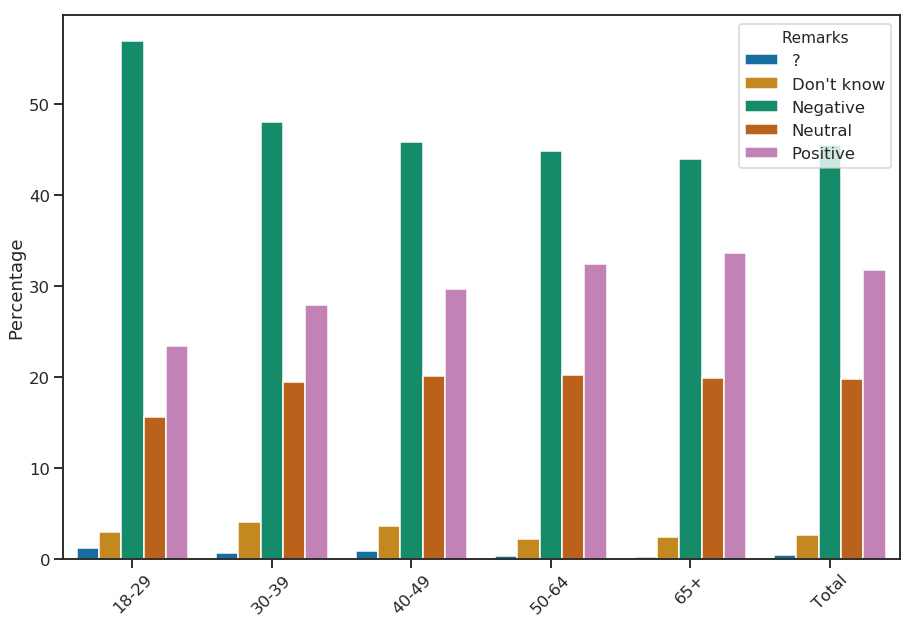

In [352]:
ndf = pos.reset_index()
s = sns.barplot(x='Age', y='Percentage', hue='Remarks', data=ndf)
s.figure.set_figheight(10)
s.figure.set_figwidth(15)
s.axes.tick_params(axis='x', rotation=45)
s.axes.set_xlabel('')

In [353]:
li = []
for age in ndf.Age.unique():
    sm = ndf[ndf.Age == age]
#     li.append([age, 
    li.append([age, sm[sm.Remarks == 'Positive']['Percentage'].values[0] - sm[sm.Remarks == 'Negative']['Percentage'].values[0]])

In [354]:
dfc = pd.DataFrame(li, columns=['Age', 'Net Positivity'])
dfc

,Age,Net Positivity
0,18-29,-33.53
1,30-39,-20.06
2,40-49,-16.20
3,50-64,-12.34
4,65+,-10.37
5,Total,-13.79


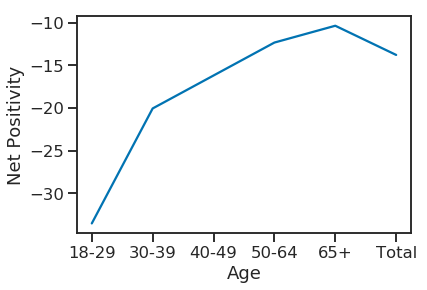

In [355]:
sns.lineplot(x='Age', y='Net Positivity', data=dfc)

In [44]:
table = pd.pivot_table(df, index=['Age', 'Party'], columns=['Gender'], aggfunc=np.sum)
display(table)

CONSENT        EMOTIONS_1        EMOTIONS_10         \
Gender                   Female   Male     Female   Male      Female   Male   
Age   Party                                                                   
18-29 Conservative         11.0    7.0       22.0   12.0        20.0   11.0   
      Liberal              31.0   11.0       54.0   18.0        60.0   22.0   
      Moderate             24.0    9.0       45.0   15.0        45.0   16.0   
      Not sure              5.0    NaN       10.0    NaN        10.0    NaN   
      Very conservative    10.0    8.0       20.0   15.0        18.0   14.0   
      Very liberal         33.0   18.0       55.0   29.0        63.0   34.0   
30-39 Conservative         40.0   11.0       78.0   22.0        76.0   19.0   
      Liberal              44.0   18.0       81.0   34.0        80.0   33.0   
      Moderate             47.0   24.0       86.0   46.0        89.0   41.0   
      Not sure             18.0    2.0       36.0    4.0        34.0    4.0   
      Very conservative    19.0    7.0       38.0   14.0        37.0   12.0   
      Very liberal         36.0   28.0       58.0   44.0        69.0   53.0   
40-49 Conservative         43.0   21.0       79.0   41.0        78.0   37.0   
      Liberal              48.0   25.0       77.0   39.0        94.0   45.0   
      Moderate             59.0   31.0      101.0   54.0       115.0   59.0   
      Not sure             14.0    1.0       27.0    2.0        27.0    2.0   
      Very conservative    25.0   17.0       47.0   34.0        47.0   32.0   
      Very liberal         52.0   22.0       85.0   32.0        95.0   39.0   
50-64 Conservative        129.0  116.0      234.0  207.0       224.0  206.0   
      Liberal             131.0   55.0      210.0   87.0       244.0  106.0   
      Moderate            174.0  125.0      300.0  200.0       320.0  240.0   
      Not sure             28.0   10.0       52.0   18.0        53.0   18.0   
      Very conservative   101.0   77.0      188.0  137.0       168.0  133.0   
      Very liberal         82.0   66.0      122.0  100.0       151.0  127.0   
65+   Conservative        124.0  278.0      225.0  480.0       217.0  498.0   
      Liberal             128.0  107.0      198.0  154.0       246.0  206.0   
      Moderate            124.0  143.0      217.0  240.0       227.0  266.0   
      Not sure              3.0    6.0        6.0   10.0         6.0   10.0   
      Very conservative    88.0  140.0      159.0  236.0       150.0  241.0   
      Very liberal         85.0   76.0      127.0  114.0       161.0  146.0   

                        EMOTIONS_11        EMOTIONS_12         ...    \
Gender                       Female   Male      Female   Male  ...     
Age   Party                                                    ...     
18-29 Conservative             21.0   13.0        21.0   14.0  ...     
      Liberal                  62.0   22.0        59.0   22.0  ...     
      Moderate                 48.0   17.0        45.0   18.0  ...     
      Not sure                  9.0    NaN        10.0    NaN  ...     
      Very conservative        20.0   15.0        20.0   16.0  ...     
      Very liberal             63.0   36.0        64.0   36.0  ...     
30-39 Conservative             78.0   22.0        79.0   22.0  ...     
      Liberal                  87.0   36.0        87.0   36.0  ...     
      Moderate                 93.0   47.0        92.0   48.0  ...     
      Not sure                 34.0    4.0        35.0    4.0  ...     
      Very conservative        37.0   14.0        37.0   13.0  ...     
      Very liberal             69.0   53.0        71.0   56.0  ...     
40-49 Conservative             83.0   40.0        86.0   41.0  ...     
      Liberal                  94.0   50.0        96.0   50.0  ...     
      Moderate                115.0   59.0       116.0   61.0  ...     
      Not sure                 26.0    2.0        27.0    2.0  ...     
      Very conservative        48.0   34.0      

In [47]:
for x in table:
    print(x)

('CONSENT', 'Female')
('CONSENT', 'Male')
('EMOTIONS_1', 'Female')
('EMOTIONS_1', 'Male')
('EMOTIONS_10', 'Female')
('EMOTIONS_10', 'Male')
('EMOTIONS_11', 'Female')
('EMOTIONS_11', 'Male')
('EMOTIONS_12', 'Female')
('EMOTIONS_12', 'Male')
('EMOTIONS_13', 'Female')
('EMOTIONS_13', 'Male')
('EMOTIONS_14', 'Female')
('EMOTIONS_14', 'Male')
('EMOTIONS_15', 'Female')
('EMOTIONS_15', 'Male')
('EMOTIONS_16', 'Female')
('EMOTIONS_16', 'Male')
('EMOTIONS_17', 'Female')
('EMOTIONS_17', 'Male')
('EMOTIONS_2', 'Female')
('EMOTIONS_2', 'Male')
('EMOTIONS_3', 'Female')
('EMOTIONS_3', 'Male')
('EMOTIONS_4', 'Female')
('EMOTIONS_4', 'Male')
('EMOTIONS_5', 'Female')
('EMOTIONS_5', 'Male')
('EMOTIONS_6', 'Female')
('EMOTIONS_6', 'Male')
('EMOTIONS_7', 'Female')
('EMOTIONS_7', 'Male')
('EMOTIONS_8', 'Female')
('EMOTIONS_8', 'Male')
('EMOTIONS_9', 'Female')
('EMOTIONS_9', 'Male')
('SOURCES_1', 'Female')
('SOURCES_1', 'Male')
('SOURCES_10', 'Female')
('SOURCES_10', 'Male')
('SOURCES_11', 'Female')
('SOURC

In [315]:
df.Age.head(5)

rowid
1      65+
2      65+
3      65+
4      65+
5    50-64
Name: Age, dtype: object

In [316]:
for name in np.sort(df.columns):
    print(df[name].head(5))

rowid
1    4
2    5
3    5
4    2
5    5
Name: APPRECIATE, dtype: object
rowid
1    3
2    5
3    1
4    5
5    1
Name: AVR, dtype: object
rowid
1               Strongly oppose
2               Strongly oppose
3               Strongly oppose
4               Strongly oppose
5    Neither support nor oppose
Name: Abolish ICE, dtype: object
rowid
1      65+
2      65+
3      65+
4      65+
5    50-64
Name: Age, dtype: object
rowid
1    Somewhat disagree
2    Strongly disagree
3    Strongly disagree
4       Somewhat agree
5    Strongly disagree
Name: Appreciate, dtype: object
rowid
1    3
2    2
3    2
4    5
5    2
Name: BAIL_item, dtype: object
rowid
1    5
2    5
3    1
4    4
5    1
Name: BOND, dtype: object
rowid
1    1
2    1
3    5
4    1
5    5
Name: BORDER, dtype: object
rowid
1    1
2    1
3    1
4    1
5    1
Name: CONSENT, dtype: int64
rowid
1    1
2    1
3    5
4    1
5    5
Name: CUSTOMS, dtype: object
rowid
1     Strongly oppose
2     Strongly oppose
3    Strongly support
4   

In [112]:
list(polling_info['FLAG'].values())

['Slavery and White Supremacy',
 'Southern Heritage and Culture',
 "Don't know",
 'Which of the following is closer to your view regarding the Confederate flag?']

In [114]:
polling_info['FLAG']['question']

'Which of the following is closer to your view regarding the Confederate flag?'

In [128]:
df['Gender'].value_counts()

Female    1756
Male      1459
Name: Gender, dtype: int64

'Whites Rate your feeling toward this group from zero (very cold or negative) to 100 (very warm or positive).'